## 1. 正交对角化
对称矩阵的所有不同的特征值对应的特征向量是相互垂直的。  
对称矩阵一定可以被正交对角化 $A=QDQ^T$， （$A=QDQ^{-1}$标准正交矩阵的逆等于标准正交矩阵的转置）  
若$A=QDQ^T$，即A一定是对称矩阵。  

## 2. 奇异值
若A是一个$m*n$的矩阵，则$A^TA$是一个$n*n$方针，且对称。  
$A^TA$可以被正交对角化，拥有n个实数特征值($\lambda_1, \lambda_2, \lambda_3, ..., \lambda_n$)；n个相互垂直的标准特征向量($\vec v_1, \vec v_2, \vec v_3, ..., \vec v_n$)。  

$||A \vec v_i||^2 = (A \vec v_i)(A \vec v_i) = (A \vec v_i)^T \cdot (A \vec v_i)= v^T_i A^T A v_i \\
= v^T_i(A^T A v_i) = v^T_i(\lambda_i v_i) \\
= \lambda_i v^T_i v_i = \lambda_i ||\vec v_i||^2 \\
= \lambda_i
$   

$A^TA$的特征值 $>=0$， $\sigma_i = \sqrt\lambda_i$，$\sigma_i$为A的奇异值。是$A \vec v_i$的长度。  

通常把奇异值从大到小排序。

$\lambda_i$是$A^TA$的特征值， $\vec v_i$是$A^TA$的标准特征向量。  
$A \vec v_i$是A的列空间的一组正交基 。

如果A有r个不为零的奇异值：${A\vec v_1, A\vec v_2, A\vec v_3, ..., A\vec v_n}$是A的列空间的一组正交基。  
A的列空间的维度为r；$rank(A)=r$ 

${\frac{A\vec v_1}{\sigma_1}, \frac{A\vec v_2}{\sigma_2},\frac{A\vec v_3}{\sigma_3}, ..., \frac{A\vec v_r}{\sigma_r}}$是A的列空间的一组标准正交基。  

## 3. 矩阵的SVD分解 - Singular Value Decomposition
矩阵的奇异值分解， 对任意形状的矩阵都使用的分解。

$$
A = U \Sigma V^T
$$

如果$A$是$m*n$的矩阵，  
$U$是$m*m$的矩阵；$\Sigma$是$m*n$的矩阵，$V$是$n*n$的矩阵。  
  
$
U = 
\begin{pmatrix}
| & | &  ... & |\\
\vec u_{1} & \vec u_{2} & ... &\vec u_{n} \\ 
| & | &  ... & |\\
\end{pmatrix}
$  

前r个u， $\vec {u_i} = \frac{A\vec {v_i}}{\sigma_i}, \sigma_i \neq 0$,  后面的使用Gram-Schmidt进行扩展(找到标准单位正交向量)   

$
\Sigma = 
\begin{pmatrix} 
\sigma_1 & 0 & ... & 0 & 0\\ 
0 & \sigma_2 & ... & 0 & 0\\
... & ... & ... & ...\\
0 & 0 & ... & \sigma_r & 0\\ 
0 & 0 & ... & 0 & 0\\ 
\end{pmatrix}
=
\begin{pmatrix} 
D & 0 \\
0 & 0
\end{pmatrix}
$
  

$V$是$A^TA$的特征向量矩阵进行标准化。

### 3.1 求解步骤
1. 求解$A^TA$的特征值和特征向量
2. 非零特征值开根号后（奇异值）得到$m*n$的$\Sigma$， 按主对角线，奇异值从大到小排序。
3. 特征向量标准化后得到$n*n$的$V$
4. $\vec {u_i} = \frac{A\vec {v_i}}{\sigma_i}$在经过Gram-Schmidt扩展得到$m*m$的$U$

In [25]:
import numpy as np

In [26]:
A = np.arange(1, 7).reshape(3, 2)
U,s,VT = np.linalg.svd(A)

In [27]:
U

array([[-0.2298477 ,  0.88346102,  0.40824829],
       [-0.52474482,  0.24078249, -0.81649658],
       [-0.81964194, -0.40189603,  0.40824829]])

In [28]:
s

array([9.52551809, 0.51430058])

In [29]:
VT

array([[-0.61962948, -0.78489445],
       [-0.78489445,  0.61962948]])

### 把SVD分解用于坐标变换   
$A = U \Sigma V^T$，如果A是$m*n$的矩阵，由于A只能乘以一个$n$为向量，想吃结果是一个m维的向量，   
那么A就是对一个n维向量做变换，转换维一个m维的向量。  
V是n维空间的一个标准正交基， 那么n维空间中的任一一个向量都可以用V的列向量来表示，  
$\vec x = k_1 \vec v_1 + k_2 \vec v_2 + + ... k_n \vec v_n = V \vec k$   
$
A \vec x = U \Sigma V^T \vec x = U \Sigma V^T V \vec k = U \Sigma \vec k = U 
\begin{pmatrix}
\sigma_1 k_1 \\
... \\
\sigma_r k_r \\
0
\end{pmatrix}
$   
  
  
由于U的列向量是m维的标准正交基，所以上面的式子可以看成是向量$\vec x$原本是V空间的一个向量，  
但是经过矩阵A变换之后，会变成U空间里被拉伸**奇异值**倍的一个向量。
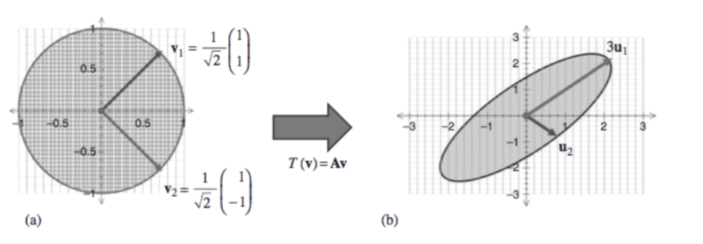

### SVD用于降维
$$
A = U \Sigma V^T =
\begin{pmatrix}
| & | &  ... & |\\
\vec u_{1} & \vec u_{2} & ... &\vec u_{n} \\ 
| & | &  ... & |\\
\end{pmatrix}
\cdot
\begin{pmatrix} 
\sigma_1 & 0 & ... & 0 & 0\\ 
0 & \sigma_2 & ... & 0 & 0\\
... & ... & ... & ...\\
0 & 0 & ... & \sigma_r & 0\\ 
0 & 0 & ... & 0 & 0\\ 
\end{pmatrix}
\cdot
\begin{pmatrix} 
-- \vec v_1 -- \\ 
-- \vec v_2 -- \\ 
...\\
-- \vec v_r -- \\ 
0 \\
...\\
0
\end{pmatrix}
\\
=
\begin{pmatrix}
| & | &  ... & |\\
\sigma_1 \vec u_{1} & \sigma_2 \vec u_{2} & ... &\sigma_n \vec u_{n} \\ 
| & | &  ... & |\\
\end{pmatrix}
\cdot
\begin{pmatrix} 
-- \vec v_1 -- \\ 
-- \vec v_2 -- \\ 
...\\
-- \vec v_r -- \\ 
0 \\
...\\
0
\end{pmatrix}
\\
=
\sigma_1 \vec u_{1} \vec v^T_1 + \sigma_2 \vec u_{2} \vec v^T_2 + ... +\sigma_r \vec u_{r} \vec v^T_r
$$

由于$\vec u_{1}$是$m*1$的矩阵，$\vec v^T_1$是$1*n$的矩阵，所以$\vec u_{1} \vec v^T_1$是$m*n$的矩阵.   
所以$A$可以看成是由r个$m*n$的矩阵相加，其中$\sigma_i$代表了每个矩阵的权重，$\sigma_1$最大。  
如果把后面部分奇异值权值较小的矩阵拿掉，那么就可以起到降维、去噪、压缩的作用。

###### 60, 80,80

In [ ]:
10 * 60 + 2*80 + 1*80